In [2]:
import xarray as xr
import copernicusmarine
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

In [3]:
def copernicus(ID,lon,lat,time,var,username='pwalfir',password='PedroW100%'):
        # Set parameters
    data_request = {
       "dataset" : ID,
       "longitude" : lon, 
       "latitude" : lat,
       "time" : time,
       "variables" : var
    }

    # Load xarray dataset
    dat = copernicusmarine.open_dataset(
        dataset_id = data_request["dataset"],
        minimum_longitude = data_request["longitude"][0],
        maximum_longitude = data_request["longitude"][1],
        minimum_latitude = data_request["latitude"][0],
        maximum_latitude = data_request["latitude"][1],
        start_datetime = data_request["time"][0],
        end_datetime = data_request["time"][1],
        variables = data_request["variables"],
        username  = username,
        password = password
    )
    return dat

## AVISO

In [4]:
dat_aviso = copernicus("cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D",
                       [-30, -26],
                       [-30,-26],
                       ["1993-01-01", "2021-06-30"],
                       ["adt"])

INFO - 2024-08-29T17:31:28Z - Dataset version was not specified, the latest one was selected: "202112"
INFO - 2024-08-29T17:31:28Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-08-29T17:31:32Z - Service was not specified, the default one was selected: "arco-time-series"


In [5]:
dat_aviso

<xarray.Dataset> Size: 21MB
Dimensions:    (time: 10408, latitude: 16, longitude: 16)
Coordinates:
  * latitude   (latitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * longitude  (longitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    adt        (time, latitude, longitude) float64 21MB ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

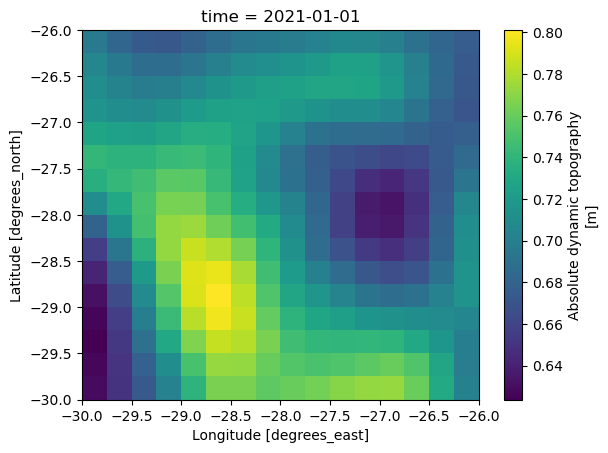

In [6]:
dat_aviso.adt.sel(time="2021-01-01T00:00:00.000000000").plot()

## GLORYS

In [7]:
dat_glorys = copernicus("cmems_mod_glo_phy_my_0.083deg_P1D-m",
                        [-31, -25],
                        [-31,-25],
                        ["1993-01-01", "2021-06-30"],
                        ["zos"])


INFO - 2024-08-29T17:31:40Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-08-29T17:31:40Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-08-29T17:31:42Z - Service was not specified, the default one was selected: "arco-time-series"


In [8]:
dat_glorys

<xarray.Dataset> Size: 222MB
Dimensions:    (time: 10408, latitude: 73, longitude: 73)
Coordinates:
  * latitude   (latitude) float32 292B -31.0 -30.92 -30.83 ... -25.08 -25.0
  * longitude  (longitude) float32 292B -31.0 -30.92 -30.83 ... -25.08 -25.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float32 222MB ...
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [9]:
dat_dow = dat_glorys.rolling(latitude=3,longitude=3,center=True).mean()

In [10]:
dat_dow = dat_dow.interp_like(dat_aviso)

In [11]:
lati = np.arange(dat_aviso.latitude.min(),dat_aviso.latitude.max()+(1/12),1/12)
loni = np.arange(dat_aviso.longitude.min(),dat_aviso.longitude.max()+(1/12),1/12)

In [12]:
dat_glorys_i = dat_glorys.interp(latitude=lati,longitude=loni)

In [13]:
dat_glorys_i

<xarray.Dataset> Size: 176MB
Dimensions:    (time: 10408, latitude: 46, longitude: 46)
Coordinates:
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
  * latitude   (latitude) float64 368B -29.88 -29.79 -29.71 ... -26.21 -26.13
  * longitude  (longitude) float64 368B -29.88 -29.79 -29.71 ... -26.21 -26.13
Data variables:
    zos        (time, latitude, longitude) float64 176MB 0.2257 ... 0.3037
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [14]:
dat_dow

<xarray.Dataset> Size: 21MB
Dimensions:    (time: 10408, latitude: 16, longitude: 16)
Coordinates:
  * latitude   (latitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * longitude  (longitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 21MB 0.2257 0.2153 ... 0.3028
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [19]:
46/16

2.875

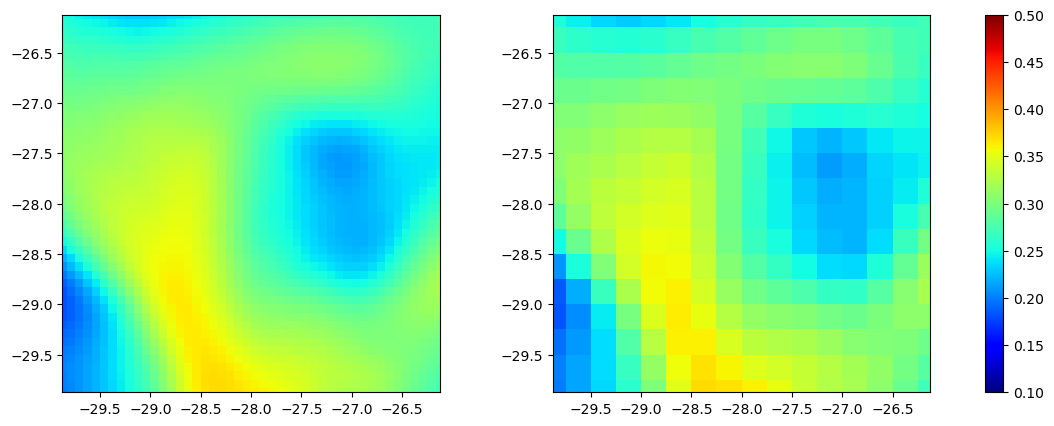

In [18]:
fig = plt.figure(figsize=(14, 7))
gs = GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)  # Define a 1x2 grid with space between subplots

ax1 = fig.add_subplot(gs[0])
c1 = ax1.pcolormesh(dat_glorys_i.longitude, dat_glorys_i.latitude, dat_glorys_i.zos.sel(time="2021-01-01T00:00:00.000000000"), 
                  vmin=0.1,vmax=.5, cmap='jet')
ax1.set_aspect('equal') 
plt.xlim(dat_aviso.longitude.min(),dat_aviso.longitude.max())
plt.ylim(dat_aviso.latitude.min(),dat_aviso.latitude.max())

ax2 = fig.add_subplot(gs[1]) 
c2 = ax2.pcolormesh(dat_dow.longitude, dat_dow.latitude, dat_dow.zos.sel(time="2021-01-01T00:00:00.000000000"), 
                  vmin=0.1,vmax=.5, cmap='jet')
ax2.set_aspect('equal')  
plt.xlim(dat_aviso.longitude.min(),dat_aviso.longitude.max())
plt.ylim(dat_aviso.latitude.min(),dat_aviso.latitude.max())

cbar = fig.colorbar(c1, ax=[ax1, ax2], location='right', shrink=0.7)



## SWOT

In [ ]:
swot = xr.open_dataset('SWOT_L3_LR_SSH_Basic_500_027_20230424T160658_20230424T165803_v1.0.nc')

In [115]:
swot

<xarray.Dataset> Size: 27MB
Dimensions:         (num_lines: 9860, num_pixels: 69, num_nadir: 0)
Coordinates:
    latitude        (num_lines, num_pixels) float64 5MB -77.05 -77.07 ... 77.05
    longitude       (num_lines, num_pixels) float64 5MB 324.6 324.6 ... 131.6
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables:
    time            (num_lines) datetime64[ns] 79kB 2023-04-24T16:06:58.03200...
    mdt             (num_lines, num_pixels) float64 5MB -1.001 ... -0.0468
    ssha            (num_lines, num_pixels) float64 5MB nan nan nan ... nan nan
    ssha_noiseless  (num_lines, num_pixels) float64 5MB ...
    i_num_line      (num_nadir) int16 0B ...
    i_num_pixel     (num_nadir) int8 0B ...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              0.001466
    geospatial_lon_max:              359.9997
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

In [ ]:
plt.scatter(x=swot.longitude, y=swot.latitude, c=swot.mdt, marker='.')
plt.colorbar()
plt.xlim(45,50)
plt.ylim(-10,10)

In [ ]:
swot.time.values

In [ ]:
dats = dat.zos.expand_dims({'NewDim':1}).transpose("time", "latitude", "longitude","NewDim")
dats_dow = dat_dow.zos.expand_dims({'NewDim':1}).transpose("time", "latitude", "longitude","NewDim")

In [ ]:
X_train, X_test, y_train, y_test = dats_dow[:-365], dats_dow[-365:], dats[:-365], dats[-365:]

In [ ]:
X_train.shape,y_train.shape

In [ ]:
X_test.shape,y_test.shape

In [ ]:
batch_size = 64
dataset = tf.data.Dataset.from_tensor_slices((X_train.astype('float32'), y_train.astype('float32')))
dataset = dataset.shuffle(buffer_size=256).batch(batch_size)


In [ ]:
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Conv2D, Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import GlobalAveragePooling2D, Input, UpSampling2D


def create_generator(
    block_widths=(128,64,32),
    input_shape=(4,4,1),
    noise_shape=(4,4,8)
):
    # inputs (concatenated)
    input_lr = Input(shape=input_shape)
    input_noise = Input(shape=noise_shape)
    x = Concatenate()([input_lr, input_noise])

    x = Conv2D(
        block_widths[0], kernel_size=(3,3), padding='same'
    )(x)
    x = LeakyReLU(0.2)(x)
    # upsampling stages
    for width in block_widths:
        x = UpSampling2D(interpolation='bilinear')(x)
        x = Conv2D(
            width, kernel_size=(3,3), padding='same'
        )(x)
        x = LeakyReLU(0.2)(x)

    # final projection to output space
    output = Conv2D(1, kernel_size=(1,1))(x)

    return Model(inputs=[input_lr, input_noise], outputs=output)


def create_discriminator(
    block_widths=(32,64,128),
    input_shape_hr=(32,32,1),
    input_shape_lr=(4,4,1),
    postproc_convs=2,
    output_activation='linear' # 'linear' when using 'from_logits' in loss
):
    # inputs
    input_hr = Input(shape=input_shape_hr)
    input_lr = Input(shape=input_shape_lr)

    # Convolution steps for both HR and LR inputs
    x_hr = Conv2D(
        block_widths[0], kernel_size=(3,3), padding='same', activation='relu'
    )(input_hr)
    x_hr = LeakyReLU(0.2)(x_hr)
    x_lr = Conv2D(
        block_widths[0], kernel_size=(3,3), padding='same', activation='relu'
    )(input_lr)
    x_lr = LeakyReLU(0.2)(x_lr)
    for width in block_widths:
        x_hr = Conv2D( # downsample HR samples on each loop
            width, kernel_size=(3,3), padding='same', strides=2,
        )(x_hr)
        x_hr = LeakyReLU(0.2)(x_hr)
        x_lr = Conv2D(
            width, kernel_size=(3,3), padding='same'
        )(x_lr)
        x_lr = LeakyReLU(0.2)(x_lr)

    # Concatenate HR and LR branches and do some joint processing
    x = Concatenate()([x_hr, x_lr])
    for _ in range(postproc_convs):
        x = Conv2D(block_widths[-1], kernel_size=(3,3), padding='same')(x)
        x = LeakyReLU(0.2)(x)

    # Pool to get outputs
    x = GlobalAveragePooling2D()(x)
    output = Dense(1, activation=output_activation)(x)

    return Model(inputs=[input_lr, input_hr], outputs=output)


generator = create_generator()
discriminator = create_discriminator()


In [ ]:
generator.summary()
discriminator.summary()

In [ ]:
# Adapted from https://keras.io/examples/generative/conditional_gan/

class DownscalingGAN(Model):
    def __init__(self, discriminator, generator, noise_shape=(4,4,8)):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.noise_shape = noise_shape
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")
        self.step_number = tf.Variable(0)

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        (samples_lr, samples_hr) = data

        # Sample noise for the generator.
        batch_size = tf.shape(samples_hr)[0]
        noise = tf.random.normal(
            shape=(batch_size,)+self.noise_shape
        )

        def train_discriminator():
            # Generate fake samples.
            samples_gen = self.generator([samples_lr, noise])

            # Combine them with real images.
            combined_samples_hr = tf.concat([samples_gen, samples_hr], axis=0)
            combined_samples_lr = tf.concat([samples_lr, samples_lr], axis=0)

            # Assemble labels discriminating real from fake images.
            labels = tf.concat(
                [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
            )

            # Train the discriminator.
            with tf.GradientTape() as tape:
                predictions = self.discriminator(
                    [combined_samples_lr, combined_samples_hr]
                )
                d_loss = self.loss_fn(labels, predictions)
            grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
            self.d_optimizer.apply_gradients(
                zip(grads, self.discriminator.trainable_weights)
            )

            # Monitor loss.
            self.disc_loss_tracker.update_state(d_loss)

        def train_generator():
            # Create labels that say "all real images".
            misleading_labels = tf.zeros((batch_size, 1))

            # Train the generator (note that we should *not* update the weights
            # of the discriminator)!
            with tf.GradientTape() as tape:
                samples_gen = self.generator([samples_lr, noise])
                predictions = self.discriminator([samples_lr, samples_gen])
                g_loss = self.loss_fn(misleading_labels, predictions)
            grads = tape.gradient(g_loss, self.generator.trainable_weights)
            self.g_optimizer.apply_gradients(
                zip(grads, self.generator.trainable_weights)
            )

            # Monitor loss.
            self.gen_loss_tracker.update_state(g_loss)
        
        # If we trained the generator now, train the discriminator next
        # or vice versa.
        
        tf.cond(
            self.step_number % 2 == 0,
            train_discriminator,
            train_generator
        )        
        self.step_number.assign(self.step_number+1)

        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }

gan = DownscalingGAN(discriminator, generator)

gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    g_optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)



In [ ]:
dataset

In [ ]:
gan.fit(dataset, epochs=30)

In [ ]:
from matplotlib import colors, gridspec, pyplot as plt

def plot_precip(ax, logR):
    ax.imshow(R, norm=colors.LogNorm(0.1,100,clip=True))
    ax.tick_params(left=False, bottom=False,
        labelleft=False, labelbottom=False)

def plot_samples(samples, labels=None):
    """ Plot a grid with many images.
    """
    N_variables = len(samples)
    N_samples = len(samples[0])
    fig = plt.figure(figsize=(N_samples*1.5, N_variables*1.5))
    gs = gridspec.GridSpec(N_variables, N_samples, hspace=0.02, wspace=0.02)

    for (i,variable) in enumerate(samples):
        for (j,sample) in enumerate(variable):
            ax = fig.add_subplot(gs[i,j])
            plot_precip(ax, sample)
            if (j == 0) and (labels is not None):
                ax.set_ylabel(labels[i])

    fig.show()

In [ ]:
rng = np.random.RandomState(seed=15)
num_samples = 8

# Selection of interesting samples from the test set
indices = [2,5,14,16,17,19,28,37]

# Uncomment to use a random selection (change seed for a different selection):
# indices = rng.choice(samples.shape[0], num_samples, replace=False)

noise = rng.randn(num_samples, 4, 4, 8)
samples_gen_1 = generator.predict_on_batch(
    [X_test[indices,...], noise]
)
noise = rng.randn(num_samples, 4, 4, 8)
samples_gen_2 = generator.predict_on_batch(
    [X_test[indices,...], noise]
)
plot_samples(
    [
        X_test[indices,...], y_test[indices,...], 
        samples_gen_1, samples_gen_2    
    ],
    labels=["LR samples", "HR samples", "Gen. samples 1", "Gen. samples 2"]
)
